In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import numpy.polynomial.polynomial as poly
from collections import OrderedDict
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
from Definitions import *

In [3]:
#  importing the data
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonArgon.npy")

In [4]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]
Percents = np.unique(vals[:,0])
Percents

array([ 90. ,  99. ,  99.9, 100. ])

In [14]:
# importing the magboltz data
MB_Data = np.loadtxt("Full-XeAr-No3.txt")
Fractions = np.flip(np.unique(MB_Data[:,0]),axis=0)[1:]
#Fractions = Fractions[-1:]
#Fractions = [85,90,100]
mm = dict()
this = MB_Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(MB_Data[x])
    mm[y] = np.array(hold)   
Fractions

array([10. ,  1. ,  0.1,  0. ])

In [15]:
# The colors that will be used
COL =['firebrick', 'steelblue', 'purple','darkblue']

In [22]:
sigma_vac = 0.01527
def Data_Calculations(Data,x):
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    # the measured sigma
    sigma1_squared = (vals[:,4]*1e6)**2
    # correcting it
    SigCor_squared = CORRECTION_SIG(dt,P,E,sigma1_squared)
    # the corrected one
    sigma_squared = sigma1_squared-SigCor_squared-(sigma_vac)**2
    #correcting V
    dt_new = CORRECTION_V(dt,P,E)
    V = d/(dt_new)
    R = E/P
    DL = sigma_squared*V**3/(2*d)*1e6*P
    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DLerr = DL*np.sqrt((B))
    
    B = (.1/(E))**2+(0.1/(P))**2
    Rerr = R*np.sqrt((B))
    
    B = (.1/(d))**2+(0.5/(dt))**2
    Verr = V*np.sqrt((B))
    
    lab = str(Pc)+'% AR '+str(100-Pc)+'% Xe'
    lab_shape = np.rint(P)
    lab_shape[lab_shape == 5] =6
    lab_shape = lab_shape.astype(str)
    return lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr


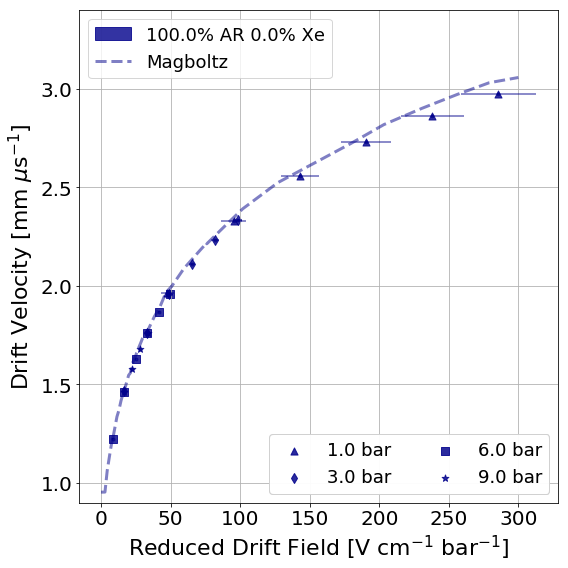

In [29]:
# 100% xenon drif velocity
plt.figure(figsize=(8,8))
x=3
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.ylim(0.9,3.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

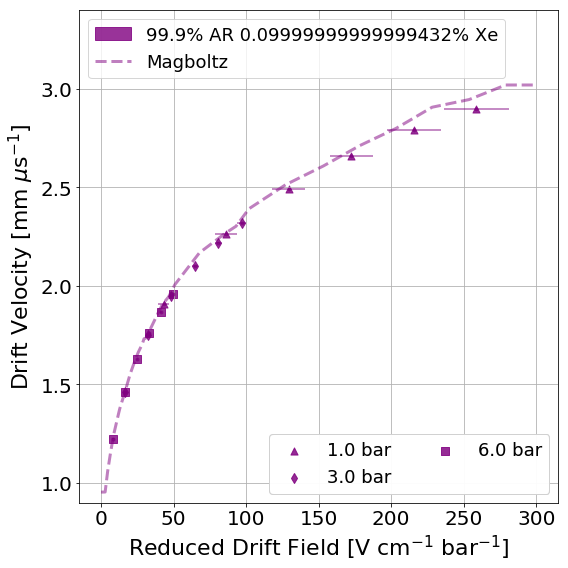

In [28]:
# 100% xenon drif velocity
plt.figure(figsize=(8,8))
x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.ylim(0.9,3.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

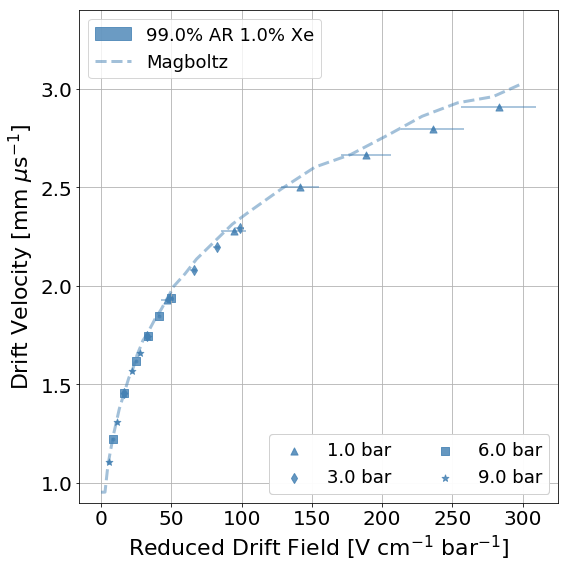

In [30]:
# 100% xenon drif velocity
plt.figure(figsize=(8,8))
x=1
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.ylim(0.9,3.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

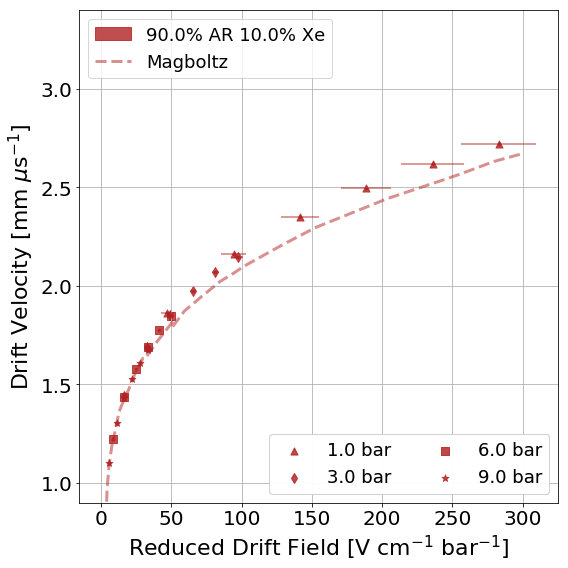

In [31]:
# 100% xenon drif velocity
plt.figure(figsize=(8,8))
x=0
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)
# pulling the proper magboltz 
MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

plt.errorbar(R, V,xerr=Rerr,yerr=Verr, alpha=0.6,color=color,fmt='.')
for x, y, m, L in zip(R, V, mark,lab_shape):
    plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
# making the legends    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
plt.gca().add_artist(legend2)

plt.ylim(0.9,3.4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

In [38]:
ArNK = np.loadtxt("ArgonPDL_NK.txt")
ArKL = np.loadtxt("ArgonPDL_KL.txt")
ww = np.loadtxt("ArgonPDL_W.txt")
brn = np.loadtxt("ArgonPDL_B.txt")

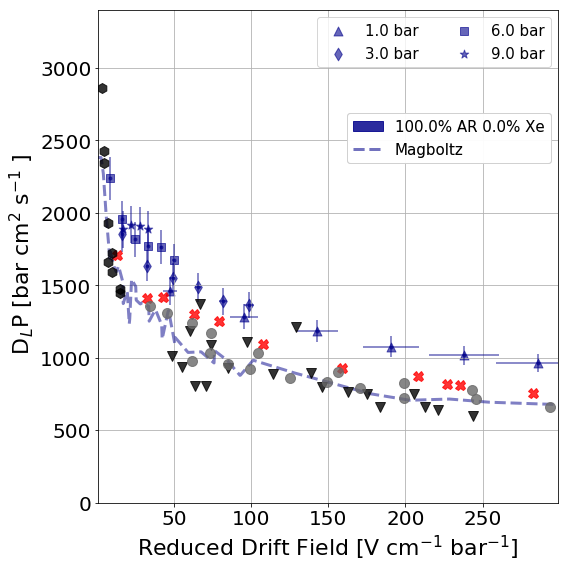

In [39]:
# 100% xenon diffusion
plt.figure(figsize=(8,8))

x=3
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")

plt.errorbar(ww[0],ww[1],fmt='X',color='r',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='r', label=r'E. B. Wagner $\it{et. al}$',alpha=0.8)

plt.errorbar(brn[0],brn[1],fmt='v',color='k',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='lime', label=r'brown $\it{et. al}$',alpha=0.8)

plt.errorbar(ArNK[0],ArNK[1],fmt='o',color='dimgrey',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='dimgrey', label=r'Y. Nakamura and M. Kurachi$',alpha=0.8)
                     
#cc, = plt.plot(ArKL[0],ArKL[1])
plt.errorbar(ArKL[0],ArKL[1],fmt='h',color='k',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='k', label=r'A. G. ROBERTSON and J. A. REES$',alpha=0.8)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,3400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

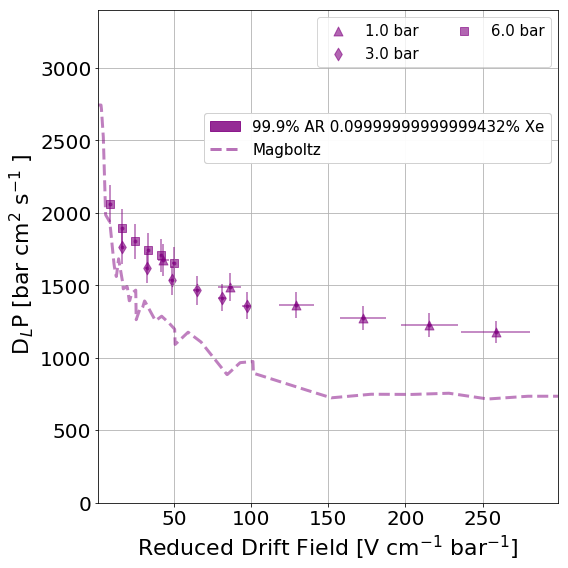

In [33]:
# 100% xenon diffusion
plt.figure(figsize=(8,8))

x=2
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,3400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

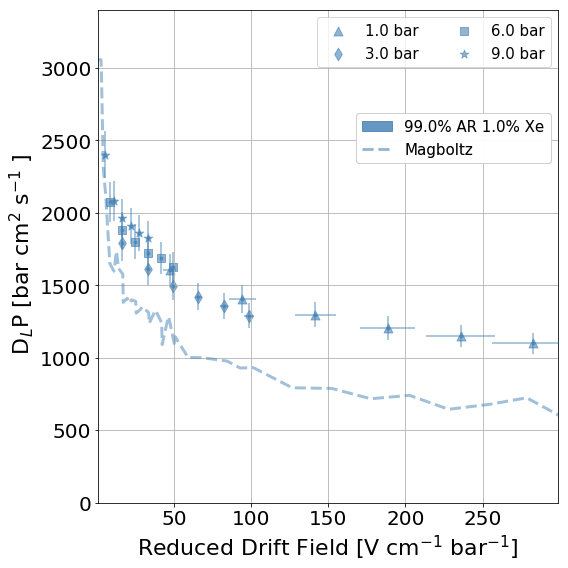

In [34]:
# 100% xenon diffusion
plt.figure(figsize=(8,8))

x=1
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,3400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

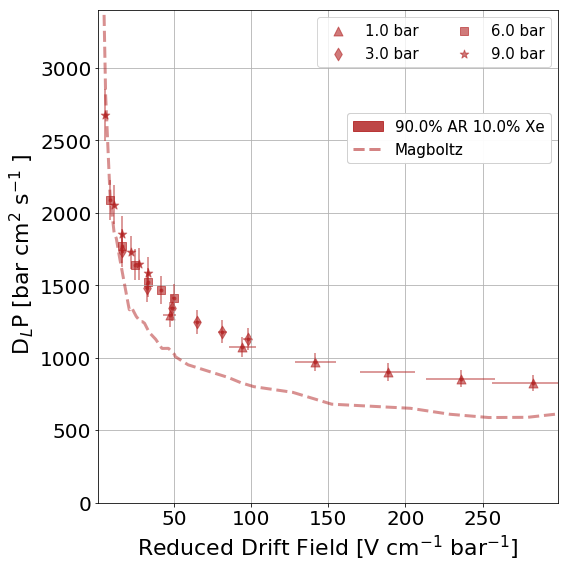

In [35]:
# 100% xenon diffusion
plt.figure(figsize=(8,8))

x=0
lab, lab_shape, mark, E, P, R, Rerr, V, Verr, DL, DLerr = Data_Calculations(Data,x)
V =V*10

color = COL[x]
# make the patches for the symbold
Pat=[]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
Pat.append(pat)

plt.errorbar(R, DL,xerr=Rerr,yerr=DLerr, alpha=0.6,color=color,fmt='.')
# pulling in hte proper magboltz
MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, DL, mark,lab_shape):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,3400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()